In [1]:
import pandas as pd 
import numpy as np
from bidi.algorithm import get_display
from arabic_reshaper import reshape
from matplotlib import pyplot# رسم شکل
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import prophet as prophet
np.set_printoptions(threshold=10000000000000000000)
pd.set_option('display.width',100000)
pd.set_option('display.max_rows',100000)
pd.set_option('display.max_columns',100000)
import warnings
warnings.filterwarnings('ignore')

Importing plotly failed. Interactive plots will not work.


In [2]:
Z=pd.read_excel("D1.xlsx")
# Z=pd.read_excel("D2.xlsx")

In [3]:
Z

,Date,Price,Open,High,Low,Vol.,Change %
0,2016-07-19,671.1,670.4,673.2,663.6,30.40K,0.0011
1,2016-07-18,670.4,676.3,680.4,664.6,42.58K,-0.0088
2,2016-07-17,676.3,660.7,680.9,660.1,46.84K,0.0237
3,2016-07-16,660.7,664.2,665.4,655.7,20.39K,-0.0053
4,2016-07-15,664.2,657.3,667.5,656.5,35.83K,0.0106
5,2016-07-14,657.3,661.2,661.9,646.3,48.20K,-0.0059
6,2016-07-13,661.2,670.6,672.0,656.0,62.96K,-0.0140
7,2016-07-12,670.6,646.7,673.2,644.6,66.59K,0.0369
8,2016-07-11,646.7,647.1,657.5,640.0,45.94K,-0.0006
9,2016-07-10,647.1,651.8,652.0,636.8,29.26K,-0.0072


In [4]:
Z.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [5]:
Y=Z[['Date','Price']]

In [6]:
Y['difference']=np.log(Y['Price']).diff()

In [7]:
Y

,Date,Price,difference
0,2016-07-19,671.1,NaN
1,2016-07-18,670.4,-0.001044
2,2016-07-17,676.3,0.008762
3,2016-07-16,660.7,-0.023337
4,2016-07-15,664.2,0.005283
5,2016-07-14,657.3,-0.010443
6,2016-07-13,661.2,0.005916
7,2016-07-12,670.6,0.014116
8,2016-07-11,646.7,-0.036290
9,2016-07-10,647.1,0.000618


In [8]:
Y.isna().sum()

Date          0
Price         0
difference    1
dtype: int64

In [9]:
Y.dropna(inplace=True)

In [10]:
Y

,Date,Price,difference
1,2016-07-18,670.4,-0.001044
2,2016-07-17,676.3,0.008762
3,2016-07-16,660.7,-0.023337
4,2016-07-15,664.2,0.005283
5,2016-07-14,657.3,-0.010443
6,2016-07-13,661.2,0.005916
7,2016-07-12,670.6,0.014116
8,2016-07-11,646.7,-0.036290
9,2016-07-10,647.1,0.000618
10,2016-07-09,651.8,0.007237


In [11]:
Y=Y.drop(['Price'],axis=1)

In [12]:
Y

,Date,difference
1,2016-07-18,-0.001044
2,2016-07-17,0.008762
3,2016-07-16,-0.023337
4,2016-07-15,0.005283
5,2016-07-14,-0.010443
6,2016-07-13,0.005916
7,2016-07-12,0.014116
8,2016-07-11,-0.036290
9,2016-07-10,0.000618
10,2016-07-09,0.007237


In [13]:
Y.rename(columns={"Date": "ds", "difference": "y"},inplace=True)

In [14]:
Y

,ds,y
1,2016-07-18,-0.001044
2,2016-07-17,0.008762
3,2016-07-16,-0.023337
4,2016-07-15,0.005283
5,2016-07-14,-0.010443
6,2016-07-13,0.005916
7,2016-07-12,0.014116
8,2016-07-11,-0.036290
9,2016-07-10,0.000618
10,2016-07-09,0.007237


In [15]:
X_train=Y[:800]
X_test=Y[800:]

In [16]:
model=Prophet()
model.fit(X_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [17]:
yhat=model.predict(X_test)

In [18]:
Y_real_test=X_test['y']

In [19]:
yhat=yhat['yhat']

In [20]:
np.sqrt(mean_squared_error(Y_real_test,yhat))

0.14418924661137453

In [21]:
mean_squared_error(Y_real_test,yhat)

0.02079053883835578

In [22]:
mean_absolute_error(Y_real_test,yhat)

0.06406132063374873

In [23]:
Y_P=model.predict(Y)
Y_P=np.array(Y_P['yhat'])

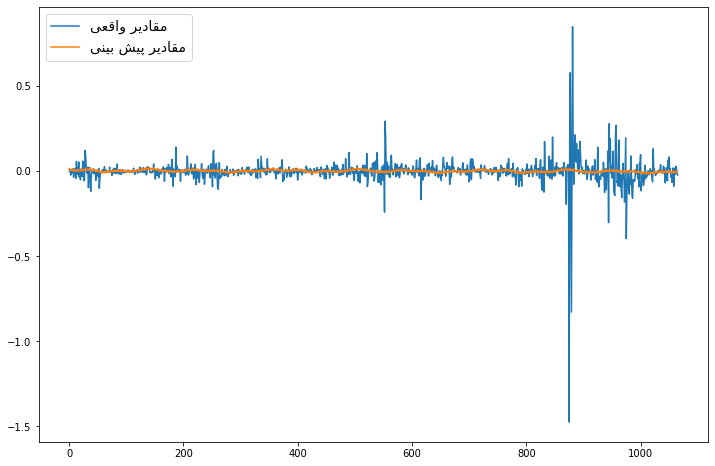

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(Y['y'],label=get_display(reshape('مقادیر واقعی')))
plt.plot(Y_P.reshape(-1,1),label=get_display(reshape('مقادیر پیش بینی')))
plt.legend(loc='best',fontsize=14)
plt.show()

In [25]:
# range_n_changepoints = np.arange(1,40)
# mean_squared_error_avg = []
# for n_changepoints in range_n_changepoints:
#     model =Prophet(n_changepoints=n_changepoints)
#     model.fit(X_train)
#     Y_P = model.predict(X_test)
#     Y_P=Y_P['yhat']
#     mean_squared_error_avg.append(np.sqrt(mean_squared_error(Y_real_test,Y_P)))
#     mean_squared_error_avg.append(n_changepoints)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Disabling daily seasonality. Run 